In [1]:
from sklearn.datasets import load_wine
import numpy as np 
dataset = load_wine()
X =dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]
X.shape, y.shape
mask = np.isnan(X)
X[mask]


array([], dtype=float64)

This tells us that at 9 we confirmed that there is no part of the dataset that actually is infact with null values. 

In [2]:
from sklearn.tree import DecisionTreeClassifier



In [3]:
clf = DecisionTreeClassifier()
clf.fit(X,y)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [4]:
# Ensure Graphviz is on PATH for pydot
import os
graphviz_bin = r"C:\\Program Files\\Graphviz\\bin"
if graphviz_bin not in os.environ.get('PATH',''):
    os.environ['PATH'] += os.pathsep + graphviz_bin
os.environ['GRAPHVIZ_DOT'] = os.path.join(graphviz_bin, 'dot.exe')


Using Graphviz dot at: C:\Program Files\Graphviz\bin\dot.EXE


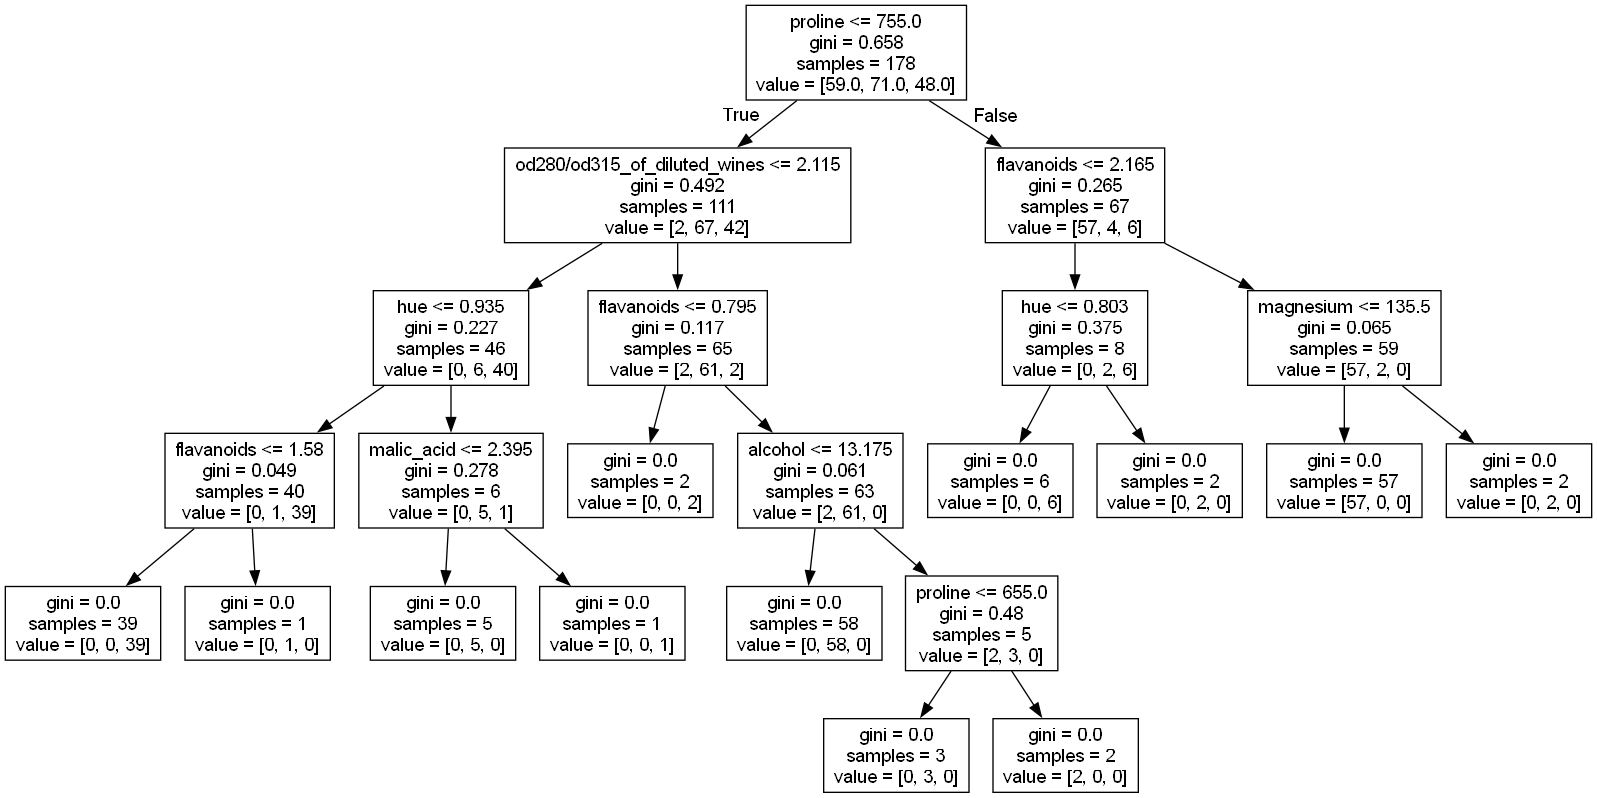

In [5]:
import os, shutil
graphviz_bin = r"C:\\Program Files\\Graphviz\\bin"
if graphviz_bin not in os.environ.get('PATH',''):
    os.environ['PATH'] += os.pathsep + graphviz_bin
os.environ['GRAPHVIZ_DOT'] = os.path.join(graphviz_bin, 'dot.exe')
dot_path = shutil.which('dot') or os.environ['GRAPHVIZ_DOT']
print('Using Graphviz dot at:', dot_path)
import pydot 
from IPython.display import Image
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier()
clf.fit(X,y)
dot_code = export_graphviz(clf,feature_names = feature_names)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png(prog=dot_path))


In [6]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

1.0

This result tells us that we do actually need to separate the training data and the test data because if we train and test in the same data then we are always going to have an accuracy of 1 which is not a good represeentatiion of the model capabilities. So now we separate our approach using test data and training data. 


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(random_state=42, max_depth=4)  # limit depth to reduce overfitting
clf.fit(X_train, y_train)

print("train acc:", accuracy_score(y_train, clf.predict(X_train)))
print("test acc :", accuracy_score(y_test, clf.predict(X_test)))


train acc: 1.0
test acc : 0.9444444444444444


Here we see that when we are using the test set, the accuracy is lower than the training set, indicating some level of overfitting. By limiting the depth of the decision tree, we can help mitigate this issue.

Down below we are going to play with modifying parameters for DecisionTreeClassifier to be able to understand how things change with each modification we do for each parameter. 

In [8]:
from sklearn.model_selection import ParameterGrid
params = {
    "max_depth" :  [None, 2, 4, 8],
    "splitter" : ["best","random"]  

}
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)
    accuracy = accuracy_score(y_test,clf.predict(X_test))
    print(f"for {config} -> {accuracy}" )
    




for {'max_depth': None, 'splitter': 'best'} -> 0.9166666666666666
for {'max_depth': None, 'splitter': 'random'} -> 0.9166666666666666
for {'max_depth': 2, 'splitter': 'best'} -> 0.8888888888888888
for {'max_depth': 2, 'splitter': 'random'} -> 0.9444444444444444
for {'max_depth': 4, 'splitter': 'best'} -> 0.9444444444444444
for {'max_depth': 4, 'splitter': 'random'} -> 0.9444444444444444
for {'max_depth': 8, 'splitter': 'best'} -> 0.9722222222222222
for {'max_depth': 8, 'splitter': 'random'} -> 0.8888888888888888


In [9]:
from sklearn.model_selection import ParameterGrid
params = {
    "max_depth" :  [None, 2, 4, 8],
    "splitter" : ["best","random"]  

}
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)
    accuracy = accuracy_score(y_test,clf.predict(X_test))
    print(f"for {config} -> {accuracy}" )
    




for {'max_depth': None, 'splitter': 'best'} -> 0.9722222222222222
for {'max_depth': None, 'splitter': 'random'} -> 1.0
for {'max_depth': 2, 'splitter': 'best'} -> 0.8888888888888888
for {'max_depth': 2, 'splitter': 'random'} -> 0.9166666666666666
for {'max_depth': 4, 'splitter': 'best'} -> 0.9722222222222222
for {'max_depth': 4, 'splitter': 'random'} -> 0.9722222222222222
for {'max_depth': 8, 'splitter': 'best'} -> 0.9444444444444444
for {'max_depth': 8, 'splitter': 'random'} -> 0.8888888888888888


In [12]:
from sklearn.model_selection import train_test_split, KFold

# Split once into train+validation pool and held-out test
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cross-validation splits on the training portion
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    # fit/score your model here using X_train, y_train, then evaluate on X_valid, y_valid
    # e.g., clf.fit(X_train, y_train); val_acc = accuracy_score(y_valid, clf.predict(X_valid))
